Getting into events per day format in a csv. Set up for Mt St Helens - created December 2022

In [2]:
import pandas as pd
import yaml
import numpy as np
import csv
import matplotlib.pyplot as plt

In [3]:
with open('/home/smocz/expand_redpy/scripts/config.yaml') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)

vv = config['vv']
volc_list_names = config['volc_list_names']
volc = volc_list_names[vv]
readdir = config['readdir']
homedir = config['homedir']

In [6]:
#read the St_Helens csvs

St_Helens = pd.read_csv(readdir+'MountStHelens_catalog.csv')

# Combining borehole and local catalogs with St_Helens

Helens_Borehole = pd.read_csv(readdir+'MSHborehole_catalog.csv')
Helens_Borehole['Clustered'] += 2000 
# Cluster 0 in Helens_Borehole is now Cluster 2000 in St_Helens
Helens_Local = pd.read_csv(readdir+'MSHlocal_catalog.csv')
Helens_Local['Clustered'] += 3000
# Cluster 0 in Helens_Local is now Cluster 3000 in St_Helens

# Use St_Helens to access all three St Helens catalogs
St_Helens = pd.concat([St_Helens,Helens_Borehole,Helens_Local])

In [5]:
#read Hood csv
Hood = pd.read_csv(readdir+'Hood_catalog.csv')

In [6]:
#make events_per_day csv

###################
# SET UP FOR HOOD #
###################

dt_list = Hood['datetime'].values.tolist() #get a list of datetimes

d_list = [] #get list of dates
for dt in dt_list:
    d = dt[:10] #take the date out of the datetime
    d_list.append(d) #append to list

uni_d_list = np.unique(d_list)

num_list = [] #list of number of events on that date, index is the same as uni_d_list
for i in uni_d_list:
    num = d_list.count(i)
    num_list.append(num)

df = pd.DataFrame(list(zip(uni_d_list,num_list)))
df.columns = ['Date','Number_of_Events']
print(df)

df.to_csv(homedir+'Mt_Hood_events_per_day.csv',index=False)

           Date  Number_of_Events
0    2009-01-23                 4
1    2009-01-24                 1
2    2009-02-10                 1
3    2009-02-12                 2
4    2009-02-28                 1
..          ...               ...
657  2022-04-06                 2
658  2022-04-13                 2
659  2022-04-25                 1
660  2022-05-10                 1
661  2022-05-29                 1

[662 rows x 2 columns]


Plot

In [13]:
#read pnsn dates FOR HOOD
pnsn = pd.read_csv(homedir+'pnsn_Hood.csv')

dt_list = pnsn['Time UTC'].values.tolist() #get a list of datetimes

d_list = [] #get list of dates
for dt in dt_list:
    d = dt[:10] #take the date out of the datetime
    d_list.append(d) #append to list

uni_d_list = np.unique(d_list)

num_list = [] #list of number of events on that date, index is the same as uni_d_list
for i in uni_d_list:
    num = d_list.count(i)
    num_list.append(num)

pnsn_df = pd.DataFrame(list(zip(uni_d_list,num_list)))
pnsn_df.columns = ['Date','Number_of_Events']
print(pnsn_df)

           Date  Number_of_Events
0    2002/01/13                 1
1    2002/01/30                 1
2    2002/02/26                 1
3    2002/03/18                 1
4    2002/04/19                 1
..          ...               ...
831  2021/11/28                 3
832  2021/12/05                 1
833  2021/12/13                 2
834  2021/12/14                 1
835  2022/01/01                 1

[836 rows x 2 columns]


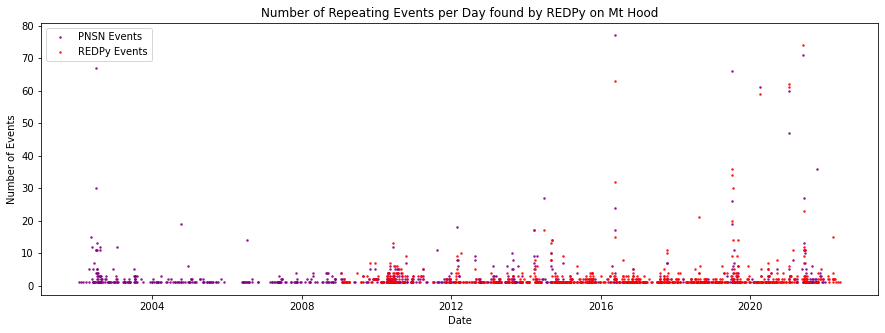

In [24]:
df = pd.read_csv(homedir+'Mt_Hood_events_per_day.csv')

x = df['Date'].values.tolist()
str_x = [str(i) for i in x]
x = pd.to_datetime(str_x)

y = df['Number_of_Events'].values.tolist()

px = pnsn_df['Date'].values.tolist()
str_px = [str(i) for i in px]
px = pd.to_datetime(str_px)

py = pnsn_df['Number_of_Events'].values.tolist()

fig, ax = plt.subplots(figsize=(15,5))

ax.scatter(px,py,s=10,alpha=0.75,marker='.',label='PNSN Events', color='purple') 
ax.scatter(x,y,s=10,alpha=0.75,marker='.',label='REDPy Events', color='red')

ax.set_xlabel('Date')
ax.set_ylabel('Number of Events')
ax.set_title('Number of Repeating Events per Day found by REDPy on Mt Hood')
plt.legend()